# In the name of Allah

## CE-40550: Machine Learning for Bioinformatics HW3


### Full name:<span style="color:red"> $Hadis$ $Ahmadian$ </span>

### Student Number:<span style="color:red"> $400211524$ </span>

## 0. Preparation

The **gene expression cancer RNA-Seq DataSet** has gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD. Load the dataset and labels using pandas. then do train-test split.


In [1]:
import pandas as pd
from sklearn import model_selection
import sklearn
##### ToDo: Load dataset and labels
ge_data_x =  pd.read_csv("data.csv",index_col=0)
ge_data_y =  pd.read_csv("labels.csv",index_col=0)
#######y######

##### ToDo: Split the data to train(80%) and test(20%) 
X_train, X_test, y_train, y_test = model_selection.train_test_split(ge_data_x, ge_data_y, test_size=0.2, random_state = 0)
#############

## 1. Dimensionality Reduction
There are too many gene expressions(attributes) for each instance. To plot the data, we need to reduce the dimensions to 2. In this section you will reduce the dimensions of the dataset by various methods. After reducing the dimensions, plot the dimension reduced instances, each colored according to its cancer type. 

### 1.1 SVD
This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA(wich we will use in next section), this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

Apply SVD on gene expression cancer RNA-Seq dataSet using Scikit Learn and plot the result.

In [6]:
##### ToDo: Apply SVD
from sklearn.decomposition import TruncatedSVD
#from scipy.sparse import csr_matrix
X = X_train
#X = csr_matrix(X)
svd = TruncatedSVD()
svd.fit(X)
X_svd=svd.transform(X)
#############

In [7]:
col={"BRCA":"blue", "KIRC":"red", "COAD":"green", "LUAD":"yellow" , "PRAD":"black"}

In [10]:
import numpy as np
Y=np.array(y_train).T[0]
YC=[]
for i in range(len(Y)):
    YC.append(col[Y[i]])

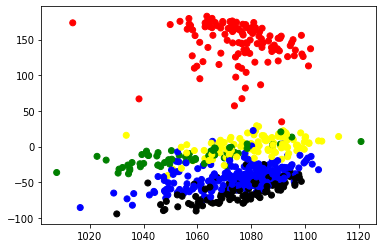

In [11]:
import matplotlib.pyplot as plt


A=X_svd.T[0]
B= X_svd.T[1]

plt.scatter(A,B, c =YC)
 
plt.show()

### 1.2 PCA
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data

Apply PCA on gene expression cancer RNA-Seq dataSet using Scikit Learn and plot the result.

In [12]:

from sklearn import decomposition
X = X_train
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

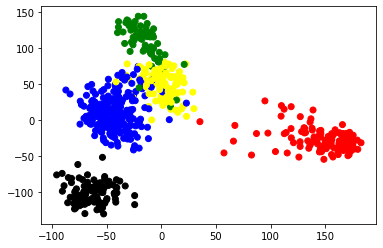

In [13]:

A=X_pca.T[0]
B= X_pca.T[1]

plt.scatter(A,B, c =YC)
 
plt.show()

### 1.3 t-SNE
t-SNE converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

Apply t-SNE on gene expression cancer RNA-Seq dataSet using Scikit Learn and plot the result.

In [14]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
X = X_train
X_tnse = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)

#############

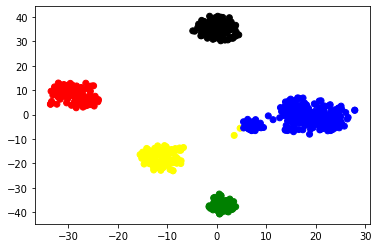

In [15]:

A=X_tnse.T[0]
B= X_tnse.T[1]

plt.scatter(A,B, c =YC)
 
plt.show()

### 1.4 Kernel PCA

In [16]:
##### ToDo: Apply Kernel PCA on dataset using different kernels: 'rbf', 'poly' and 'sigmoid'
from sklearn.decomposition import KernelPCA
X = X_train
transformer = KernelPCA(n_components=2, kernel='rbf')
X_rbf = transformer.fit_transform(X)
#############

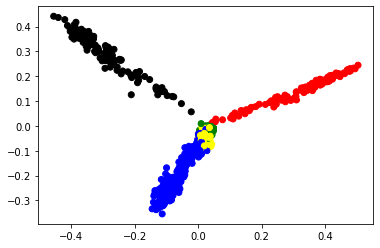

In [17]:

A=X_rbf.T[0]
B= X_rbf.T[1]

plt.scatter(A,B, c =YC)
 
plt.show()

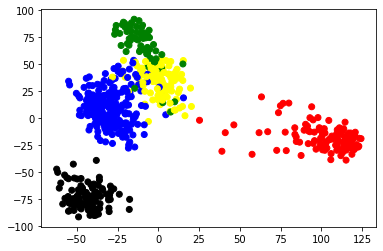

In [18]:
X = X_train
transformer = KernelPCA(n_components=2, kernel='poly')
X_poly = transformer.fit_transform(X)


A=X_poly.T[0]
B= X_poly.T[1]

plt.scatter(A,B, c =YC)
 
plt.show()

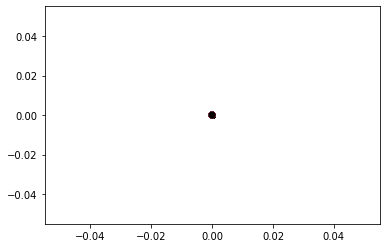

In [19]:

X = X_train
transformer = KernelPCA(n_components=2, kernel='sigmoid')
X_sig = transformer.fit_transform(X)


A=X_sig.T[0]
B= X_sig.T[1]

plt.scatter(A,B, c =YC)
 
plt.show()

## 2. Clustering
In this section, you will use two clustering methods to cluster the dataset instances according to gene expressions. In both methods, set the number of clusters to five, as there are five cancer types in the dataset. After clustering by each method, use ground truth labels to evaluate the model and get an accuracy measure of the classification of instances.

### 2.1 k-Means
The k-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

Apply k-Means on the best results of the dimension reduction methods in previous steps by Scikit Learn, plot the results of clustering and get accuracy of the model according to ground truth labels.

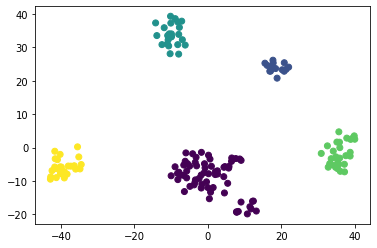

In [20]:
from sklearn.cluster import KMeans
X = ge_data_x
X = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, ge_data_y, test_size=0.2, random_state = 0)



kmeans = KMeans(n_clusters=5).fit(X_train)


y_pred=kmeans.predict(X_test)


A=X_test.T[0]
B= X_test.T[1]

plt.scatter(A,B, c =y_pred)
 
plt.show()

In [25]:
label={"BRCA":2,
"PRAD":1
,"LUAD":0
,"KIRC":3
,"COAD":4}
Y=np.array(y_test).T[0]
Y_l_t=[]
for i in range(len(Y)):
    Y_l_t.append(label[Y[i]])
    
    
cm = sklearn.metrics.confusion_matrix(Y_l_t, y_pred)
cm_argmax = cm.argmax(axis=0)
y_pred_ = np.array([cm_argmax[i] for i in y_pred]) 
y_pred=y_pred_
    
print("accuracy=",sklearn.metrics.accuracy_score(Y_l_t, y_pred)*100)

accuracy= 100.0


### 2.2 Expectation-Maximization
Here we are using Gaussian Mixture Models to cluster dimension reduced data using EM algorithm by scikit learn. Write necessary codes in "ToDo" boxes to train GMMs, measure the accuracy of the model and plot the results.

In [26]:
label={"BRCA":0,
"PRAD":1
,"LUAD":2
,"KIRC":3
,"COAD":4}

Y=np.array(y_train)
Y_l=[]
for i in range(len(Y)):
    Y_l.append(label[Y[i][0]])


In [27]:
label={"BRCA":0,
"PRAD":1
,"LUAD":2
,"KIRC":3
,"COAD":4}

Y=np.array(y_test)
Y_l_t=[]
for i in range(len(Y)):
    Y_l_t.append(label[Y[i][0]])


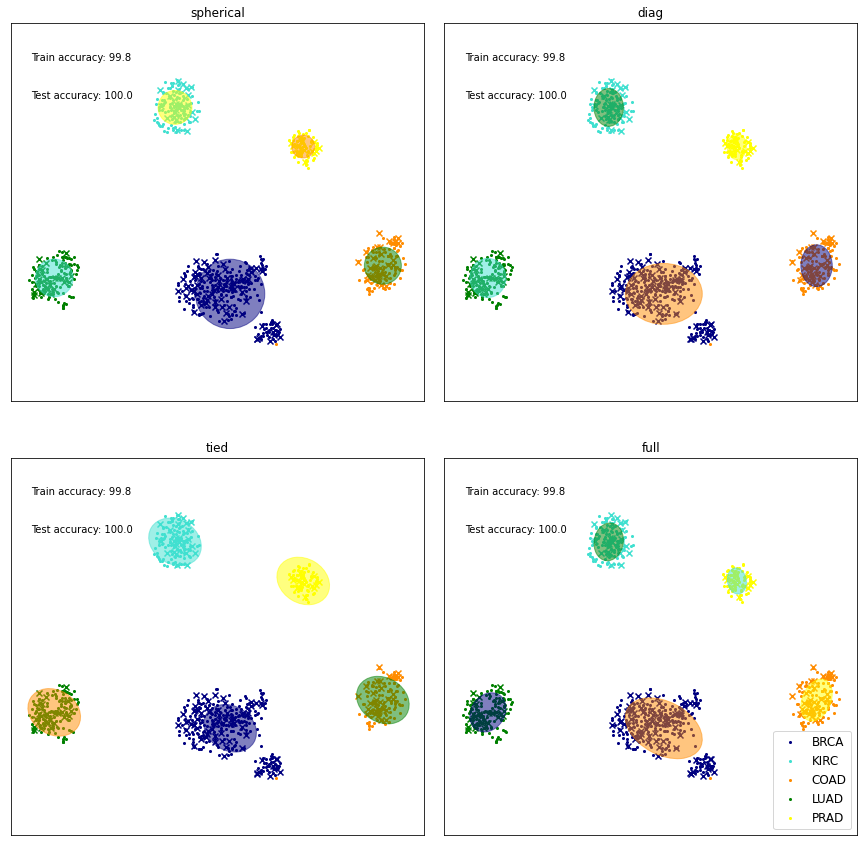

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange", 'green', 'yellow']
cancer_types = ["BRCA", "KIRC", "COAD", "LUAD", "PRAD"]


def make_ellipses(gmm, ax):
    # Draw a covariance confidence ellipse. Visit this website for more info.: 
    # https://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/
    
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances) # get eigen values and eigen vectors for covariance matrix
        u = w[0] / np.linalg.norm(w[0]) # normalize first eigen vector
        angle = np.arctan2(u[1], u[0]) # get rotation of ellipse using angle of first eigen vector
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v) # get major axis length
        ell = mpl.patches.Ellipse(
            gmm.means_[n], v[0], v[1], 180 + angle, color=color
        ) # draw ellipse using matplotlib
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")
        
cov_types = ["spherical", "diag", "tied", "full"]
n_estimators = len(cov_types)

plt.figure(figsize=(6 * n_estimators // 2, 12))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)
        
##### ToDo: Use the data of best dimension reduction method used in previous steps
##### (with 80% of data as train and 20% as test)
X_reduced_train = X_train
y_train = y_train
X_reduced_test = X_test
y_test = y_test
#############

n_classes = len(np.unique(y_train))

##### ToDo: Define four GMMs with different covariance matrix
##### types "spherical", "diag", "tied" and "full" in GMM implementation of scikit learn.
##### Explain differences between these four covariance matrix types in the next cell.
estimators = {
    cov_type: GaussianMixture(n_components=5, covariance_type=cov_type)
    for cov_type in cov_types
}
#############

for index, (name, estimator) in enumerate(estimators.items()):
    
##### ToDo: Since we have class labels for the training data, we can initialize
##### the GMM means in a supervised manner. So set initial value of clusters mean
##### (guassian means) to mean of each cancer type instances.  
    #estimator.means_init = [ .... for i in range(n_classes)]
#############

    #Train the other parameters of GMMs using the EM algorithm.
    estimator.fit(X_reduced_train,y_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    
    
        
    
    # Plot the train data with dots
    for n, color in enumerate(colors):

        data = X_reduced_train[(np.array(Y_l)==n)]

        plt.scatter(data[:, 0], data[:, 1], s=4.2, color=color, label = cancer_types[n])
        
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_reduced_test[(np.array(Y_l_t) == n)]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

##### ToDo: Predict on test data and get accuracy of the model
    y_pred = estimator.predict(X_reduced_train)
    
    cm = sklearn.metrics.confusion_matrix(Y_l, y_pred)
    cm_argmax = cm.argmax(axis=0)
    y_pred_ = np.array([cm_argmax[i] for i in y_pred])
    y_pred=y_pred_
    
    train_accuracy = sklearn.metrics.accuracy_score(Y_l, y_pred_)*100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_pred = estimator.predict(X_reduced_test)
    
    cm = sklearn.metrics.confusion_matrix(Y_l_t, y_pred)
    cm_argmax = cm.argmax(axis=0)
    y_pred_ = np.array([cm_argmax[i] for i in y_pred]) 
    y_pred=y_pred_
    
    test_accuracy = train_accuracy = sklearn.metrics.accuracy_score(Y_l_t, y_pred_)*100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)
#############

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))

plt.show()

##### ##### ToDo: Explain differences between four covariance matrix types
according to skitlearn documentation:

•	'full' (each component has its own general covariance matrix)

•	'tied' (all components share the same general covariance matrix)

•	'diag' (each component has its own diagonal covariance matrix)

•	'spherical' (each component has its own single variance)


## توضيح بيشتر )

    full : در اين حالت کامپوننت ها ميتوانند مستقلا هر شکل و موقعيتي داشته باشند
           اين دقيقا به همين علت است که هر کامپوننت ماتريس کواريانس جنرال خود را دارد.
           
    tied: کامپوننت ها همگي هم شکل خواهند بود اما اين شکل هرطور ميتواند باشد
          اين دقيقا به همين علت است که تمام کامپوننت ها ماتريس کورايانس جنرال يکساني دارند
          
          
    diag: محورهای کانتور در امتداد محورهای مختصات هستند، اما گريز از مرکز ممکن است بین اجزا متفاوت باشد
          دقيقا معادل همين است که هر کامپوننت ماتريس کورايانس قطري خود را دارد.
    
    spherical: مانند حالت قبل است با اين تفاوت که تمام کانتور ها بايد لزوما دايره باشند
               تمام کامپوننت ها يک تک واريانس دارند به همين علت کانتور ها به شکل توضيح داده شده ميشوند.
               
               
    در چهار پلات بالا نيز ميتوان ديد اين توصيفات برقرار است